<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_jointgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [1]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [2]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###jointgrid

###jointgrid 실습에 사용할 데이터
- penguins
  - species(object) : 펭귄의 종
  - island(object) : 섬
  - bill_length_mm(float64) : 부리의 길이
  - bill_depth_mm(float64) : 부리의 깊이
  - flipper_length_mm(float64) : 팔의 길이
  - body_mass_g(float64) : 몸의 질량
  - sex(object) : 성별

####penguins

In [3]:
#데이터 로드하기
penguins = sns.load_dataset('penguins')

In [4]:
#데이터 정보
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
#데이터 수치적 요약
penguins.describe(include=np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
#데이터 범주형 요약
penguins.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [7]:
#결측치 확인
penguins[penguins['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


####그래프 확인

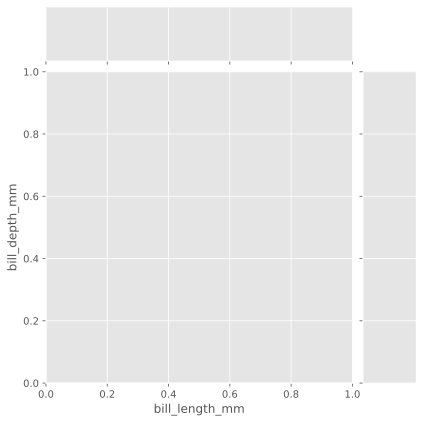

In [8]:
sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')

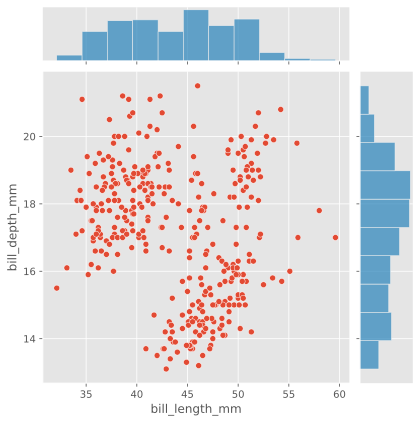

In [10]:
#JointGrid에 플롯 그리기
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot(sns.scatterplot, sns.histplot)

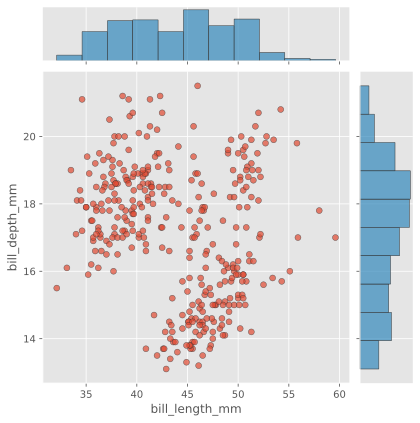

In [11]:
#매개변수 전달하기
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)

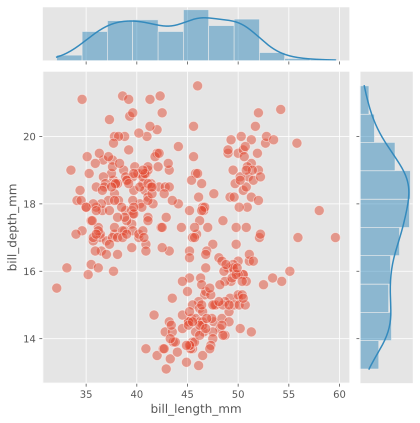

In [12]:
#각각 다른 매개변수 전달
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

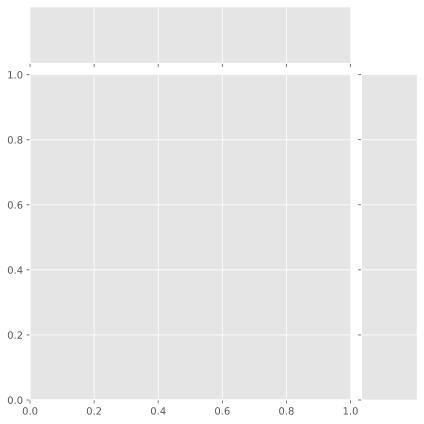

In [13]:
g = sns.JointGrid()

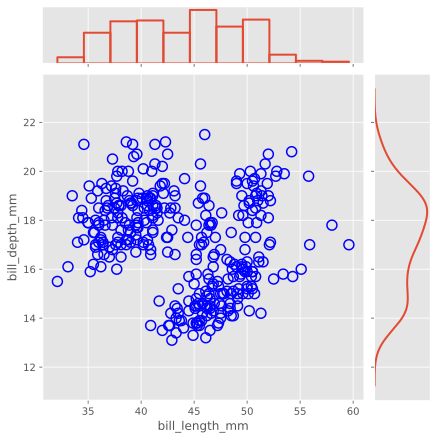

In [16]:
#ax_joint, ax_marg_x, ax_marg_y 특성에 엑세스하여 플롯
g = sns.JointGrid()
x, y = penguins['bill_length_mm'], penguins['bill_depth_mm']
sns.scatterplot(x=x, y=y, ec='b', fc='none', s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)

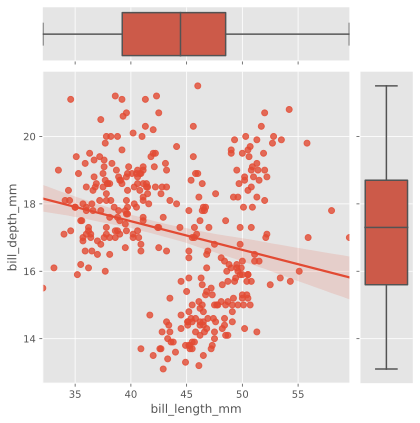

In [17]:
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot(sns.regplot, sns.boxplot)

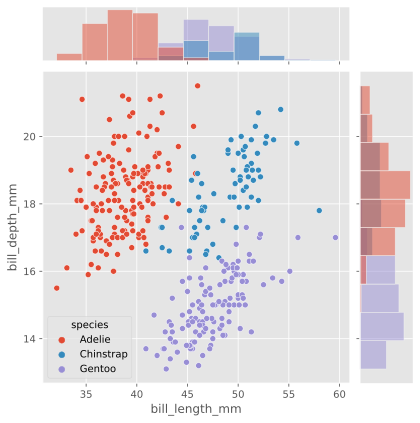

In [18]:
#hue 옵션 사용
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
g.plot(sns.scatterplot, sns.histplot)

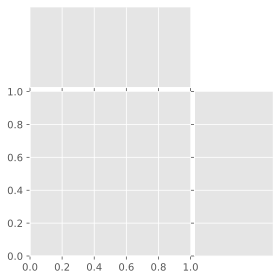

In [19]:
#크기 조절
sns.JointGrid(height=4, ratio=2, space=.05)

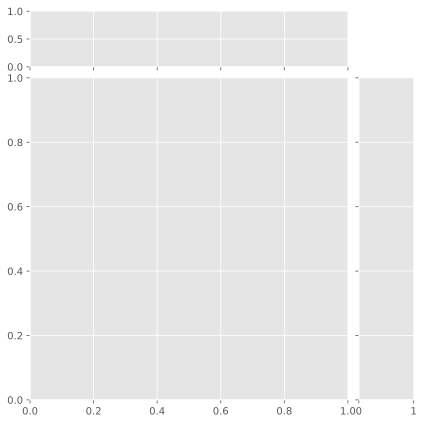

In [20]:
sns.JointGrid(marginal_ticks = True)

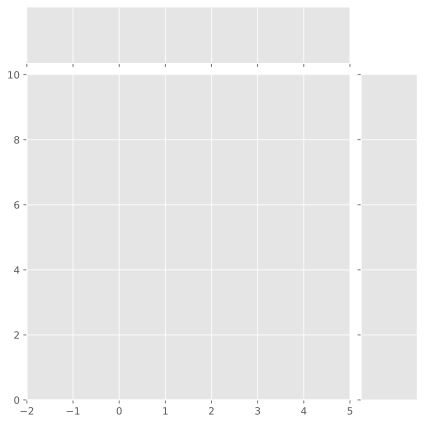

In [21]:
#두 데이터 축에 대한 한계 정의
sns.JointGrid(xlim=(-2,5), ylim=(0,10))